In [2]:
import numpy as np
import pandas as pd
import string
import seaborn as sns
import altair as alt
import vega
import regex as re
alt.__version__

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
%matplotlib inline

import IPython; IPython.__version__
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Import Stopwords

In [3]:
print ('Importation du dictionnaire de stopwords SPACY')
from spacy.lang.en.stop_words import STOP_WORDS
print("Liste de stopwords français de SPACY a %d entrées" % len(STOP_WORDS))
print (STOP_WORDS)
print ('\n')

import nltk
print ('Importation du dictionnaire de stopwords NLTK')
from nltk.corpus import stopwords
stopwords_en = set(stopwords.words('english'))
print("Liste de stopwords de NLTK a %d entrées" % len(stopwords_en))
print(stopwords.words('english'))
print ('\n')

from gensim.parsing.preprocessing import STOPWORDS 
print ('Importation du dictionnaire GENSIM')
print("Liste de stopwords de GENSIM a %d entrées" % len(STOPWORDS))
print (STOPWORDS)
print ('\n')

# customisation
custom = {'ft','via','like','build','get','would','one','two','feel','lol','fuck','take','way','may','first','latest'
                'want','make','back','see','know','let','look','come','got','still','say','think','great','pleas','amp'}

STOP_WORDS = custom.union(stopwords_en).union(STOPWORDS)
#ajout
STOP_WORDS |= {'like'}
#suppression
STOP_WORDS -= {"fire","hundred", 'move', 'serious'}

print("Liste définitive de stopwords a %d entrées" % len(STOP_WORDS))
print("Liste finale des mots clés supprimés automatiquement")
print(sorted(STOP_WORDS))

Importation du dictionnaire de stopwords SPACY
Liste de stopwords français de SPACY a 326 entrées
{'across', 'four', 'doing', 'therein', 'mostly', 'so', 'does', 'then', 'whereupon', 'forty', 'became', 'next', 'thereby', 'up', 'made', '’re', 'six', 'eight', 'keep', 'several', 'less', 'whoever', 'when', "n't", 'various', 'her', 'before', 'beforehand', 'either', "'ll", 'thus', 'another', 'it', 'about', 'front', 'three', 'becoming', 'toward', 'nowhere', 'first', 'even', 'something', 'from', 'say', 'while', 'move', 'n‘t', 'a', 'through', 'top', '’m', 'already', 'enough', 'towards', 'one', 'us', '‘ve', 'until', 'more', 'no', 'well', 'anyhow', 'had', 'because', 'again', 'in', "'m", 'has', 'moreover', 'serious', 'indeed', 'whose', 'become', 'seems', 'yourself', 'how', 'as', 'on', 'above', 'latterly', 'few', 'amongst', 'those', 'not', 'everywhere', 'almost', 'without', 'really', 'behind', 'might', 'cannot', 'herself', 'amount', 'whereas', 'this', 'which', 'against', 'put', 'regarding', 'your', 

## Helper fonctions 

In [139]:
# compter le nombre de mots
def word_count (text):
    x = re.sub(r'\s+', ' ', text)
    count = len(re.findall(r'\w+', x))
    return (count)

def percentage(text):
    up = re.findall(r'[A-Z]', text)
    text = re.sub(r'\s+', ' ', text)#
    if len(up) == 0:
        percentage = 0
    else: 
        percentage= float(len(up)) / len(text)
    return percentage

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

# diversité lexicale
def lexical_diversity (text):
    if len(text) == 0:
        diversity = 0
    else: 
        diversity = float(len(set(text))) / len(text)
    return diversity

import textacy
import textacy.preprocessing as tprep

if textacy.__version__ < '0.11':
    # ancienne version de textaxy
    def normalize(text):
        text = tprep.normalize_hyphenated_words(text)
        text = tprep.normalize_quotation_marks(text)
        text = tprep.normalize_unicode(text)
        text = tprep.remove_accents(text)
        return text

else:
    # textacy 0.11
    def normalize(text):
        text = tprep.normalize.hyphenated_words(text)
        text = tprep.normalize.quotation_marks(text)
        text = tprep.normalize.unicode(text)
        text = tprep.remove.accents(text)
        return text

def clean_text_contractions(text):
    text = text.lower()
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"won't", "would not ", text)
    text = re.sub(r"i\'m", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"there's", "there is",text)
    text = re.sub(r"we're", "we are", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"they're", "they are", text)
    text = re.sub(r"can't", "cannot", text)
    text= re.sub(r"wasn't", "was not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"hasn't", "has not", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"you're", "you are", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"wouldn't", "would not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"here's", "here is", text)
    text = re.sub(r"you've", "you have", text)
    text = re.sub(r"we're", "we are", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"we've", "we have", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"y'all", "you all", text)
    text = re.sub(r"would've", "would have", text)
    text = re.sub(r"it'll", "it will", text)
    text = re.sub(r"we'll", "we will", text)
    text = re.sub(r"we've", "we have", text)
    text = re.sub(r"he'll", "he will", text)
    text = re.sub(r"y'all", "you all", text)
    text = re.sub(r"Weren't", "Were not", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"they'll", "they will", text)
    text = re.sub(r"they'd", "they would", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"they've", "they have", text)
    text = re.sub(r"i'd", "I would", text)
    text = re.sub(r"should've", "should have",text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"we'd", "we would", text)
    text = re.sub(r"i'll", "i will", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"they're", "they are", text)
    text = re.sub(r"let's", "let us", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"you're", "you are", text)
    text = re.sub(r"i've", "I have", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"i'll", "i will", text)
    text = re.sub(r"doesn't", "does not", text)
    text = re.sub(r"i'd", "I would", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"ain't", "am not", text)
    text = re.sub(r"you'll", "you will", text)
    text = re.sub(r"I've", "I have", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"i'll", "i will", text)
    text = re.sub(r"i'd", "i would", text)
    text = re.sub(r"let's", "let us", text)
    text = re.sub(r"you'd", "you would", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"ain't", "am not", text)
    text = re.sub(r"haven't", "Have not", text)
    text = re.sub(r"could've", "Could have", text)
    text = re.sub(r"youve", "you have", text)
    text = re.sub(r"fvck","fuck",text)
    text = re.sub(r'\s+', ' ', text)
    return text  

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def corr(s):
    return re.sub(r'[\.,](?!\r)', '. ', re.sub(r' +', ' ', s))           

### pipeline pour éléments bow

In [10]:
# tokenization
from nltk.tokenize import WordPunctTokenizer
def tokenizer_wp(text):
    tokenizer = WordPunctTokenizer()
    return (tokenizer.tokenize(text))

# stopwords
def remove_stop_words(tokens):
    return [t for t in tokens if str(t).lower() not in STOP_WORDS]

# orchestration pipeline de transformation
def prepare(text, pipeline):
    texts = text
    for transforms in pipeline:
        texts = transforms(texts)
    return texts

pipeline = [str.lower, tokenizer_wp, remove_stop_words]

## Importation des données

In [5]:
train = pd.read_csv(r'C:\Users\ADSL\Downloads\kaggle_nlp\train.csv', sep=',')
test = pd.read_csv(r'C:\Users\ADSL\Downloads\kaggle_nlp\test.csv', sep=',')
print("Il y a {} lignes et {} colonnes dans le dataset training data".format(train.shape[0],train.shape[1]))
print("Il y a {} lignes et {} colonnes dans le dataset training data".format(test.shape[0],test.shape[1]))

Il y a 7613 lignes et 5 colonnes dans le dataset training data
Il y a 3263 lignes et 4 colonnes dans le dataset training data


In [6]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [7]:
test.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


### transformation data

In [8]:
for column in train:
    print("Column ", column, "is dtype:", train[column].dtype.name)

Column  id is dtype: int64
Column  keyword is dtype: object
Column  location is dtype: object
Column  text is dtype: object
Column  target is dtype: int64


In [204]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

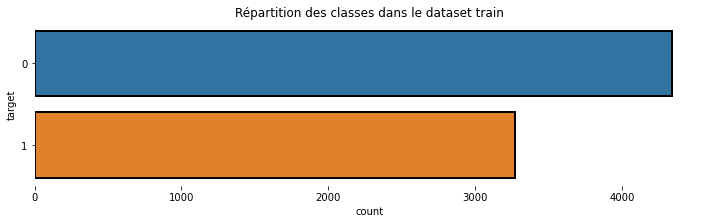

In [205]:
train['target'].value_counts()

plt.figure(figsize=(12,3))
plt.title("Répartition des classes dans le dataset train")
sns.countplot(y=train["target"],linewidth=2,
                   edgecolor='black')
plt.box(False)
plt.show()

## Features caracteristiques basiques text

In [206]:
punctuation = string.punctuation
train['COUNTING_WORDS']=train['text'].apply(lambda x: word_count(x))
train['NB_CAR'] = train['text'].str.len()
train['UP_CAR'] =  train['text'].str.findall(r'[A-Z]').str.len()
train['%_UP_CAR'] = train['text'].apply(lambda x: percentage(x))
train['WORD_DENSITY'] = train['NB_CAR'] / (train['COUNTING_WORDS']+1)
train['NB_PUNCTUATION_COUNT'] = train['text'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
train['TITLE_WORD_COUNT'] = train['text'].apply(lambda x: len([word for word in x.split() if word.istitle()]))
train['UPPER_CASE_WORD_COUNT'] = train['text'].apply(lambda x: len([word for word in x.split() if word.isupper()]))
train['STOPWORD_COUNT'] = train['text'].apply(lambda x: len([word for word in x.split() if word.lower() in STOPWORDS]))
train['COUNTING_WORDS'] = train['text'].apply(lambda x: word_count(x))

url_regex = r'[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)'

train['URL'] = train['text'].str.contains(url_regex,regex=True)

## Viz Features

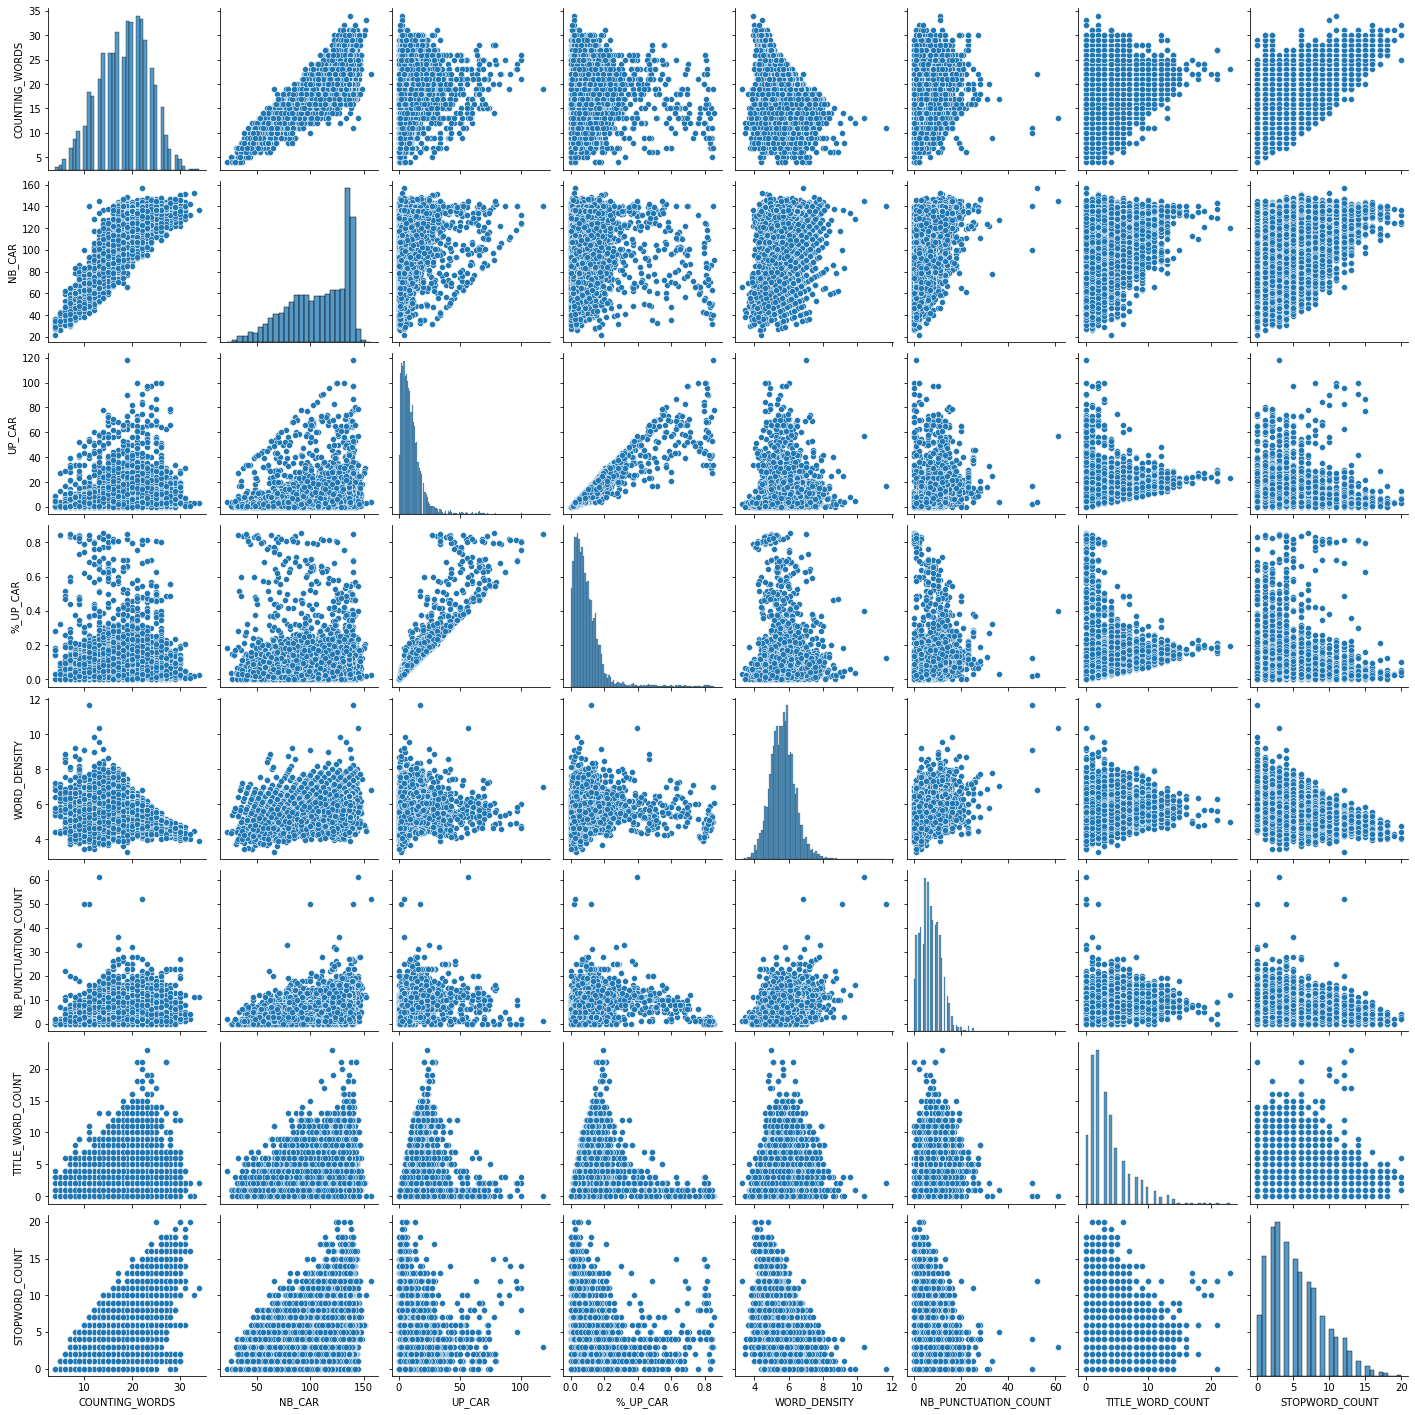

In [241]:
sample_df = train[['COUNTING_WORDS','NB_CAR','UP_CAR','%_UP_CAR','WORD_DENSITY','NB_PUNCTUATION_COUNT',
                   'TITLE_WORD_COUNT','STOPWORD_COUNT']]
sns.pairplot(sample_df,palette="husl")

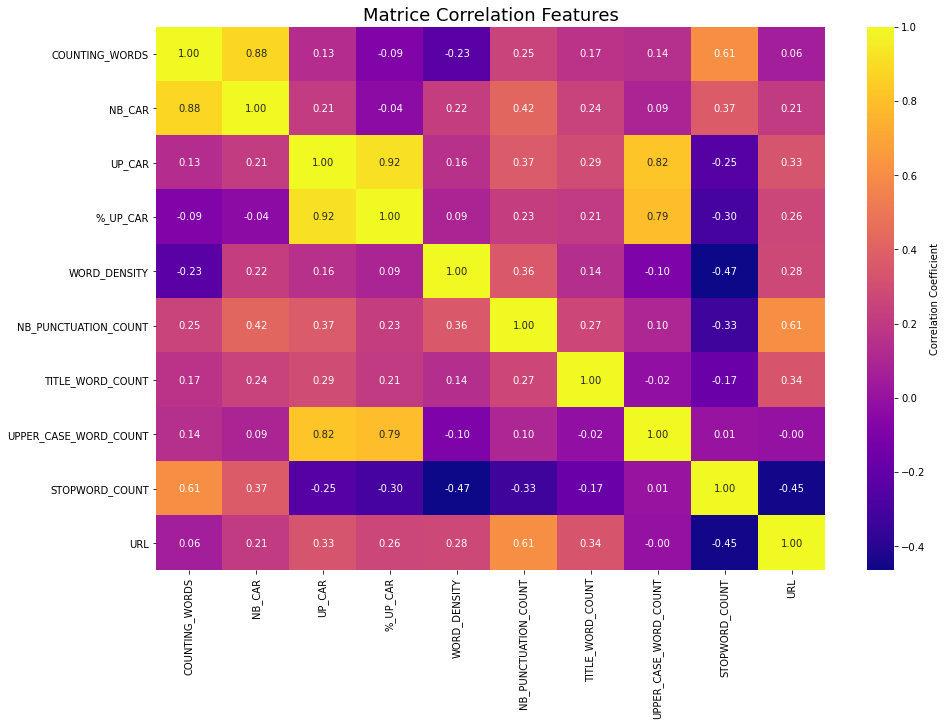

In [242]:
f, ax = plt.subplots(figsize= [15,10])
sns.heatmap(train.drop(['id','keyword', 'location','text','target'], axis=1).corr(), annot=True, fmt=".2f", 
            ax=ax, cbar_kws={'label': 'Correlation Coefficient'}, cmap='plasma')
ax.set_title("Matrice Correlation Features", fontsize=18)
plt.show()

### Diversité

In [243]:
# diversité
grouped = train.groupby('target')
diversity = grouped.apply(lexical_diversity)
diversity

target
0    0.004403
1    0.005176
dtype: float64

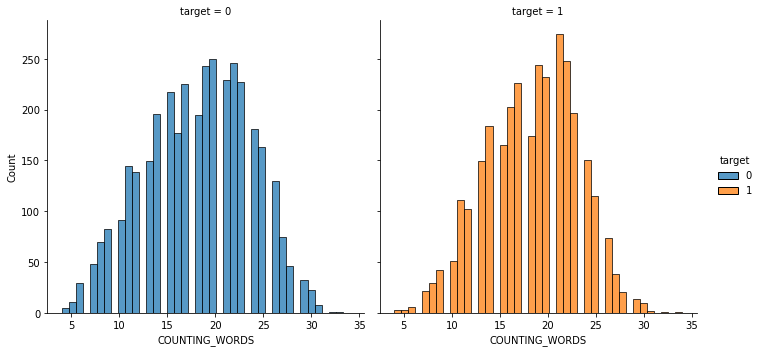

In [244]:
sns.displot(data= train, x="COUNTING_WORDS", col="target",hue="target")

### Nombre de caractères

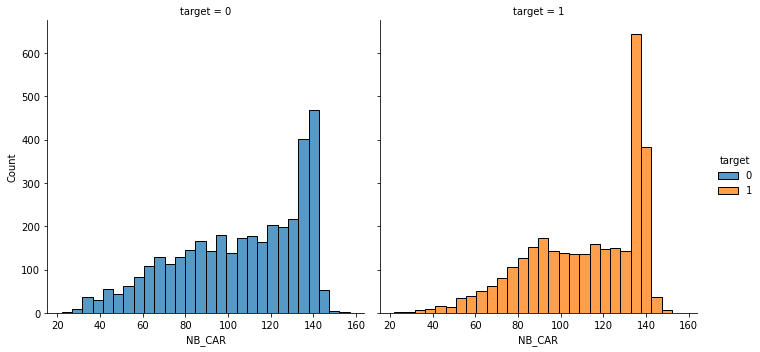

In [245]:
sns.displot(data= train, x="NB_CAR", col="target",hue="target")

### Pourcentage de lettres en majuscule

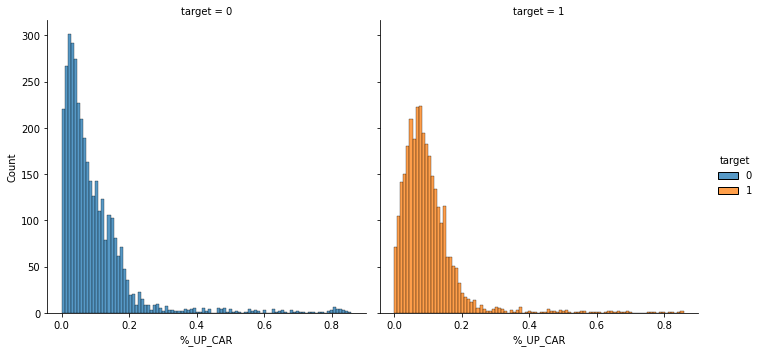

In [246]:
sns.displot(data= train, x="%_UP_CAR", col="target",hue="target")

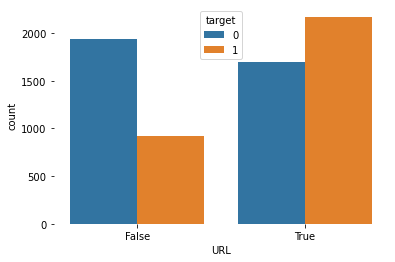

In [247]:
sns.countplot(data= train, x="URL",hue="target")
plt.box(False)

## Feature sentiment analysis
 - Tests Hugging face model directement
 - TO DO tester implémentation plus avancée cf. Github livre Hugging Face https://github.com/nlp-with-transformers/notebooks

In [ ]:
! pip install transformers sentencepiece datasets xlsxwriter advertools

In [21]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import BertModel, AdamW, get_linear_schedule_with_warmup
from transformers import BertTokenizer, BertConfig, BertForSequenceClassification
from transformers import pipeline, TFAutoModelForSequenceClassification
import sentencepiece

C:\ProgramData\Anaconda3\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
C:\ProgramData\Anaconda3\lib\site-packages\torchaudio\backend\utils.py:89: UserWarning: No audio backend is available.
  warnings.warn('No audio backend is available.')


In [22]:
#importation du modele cardiff
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

In [23]:
sent_cardiff = (
    train
    .assign(sentiment = lambda x: x['text'].apply(lambda s: sentiment_task(s)))
    .assign(
         label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
         score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))
    )
)

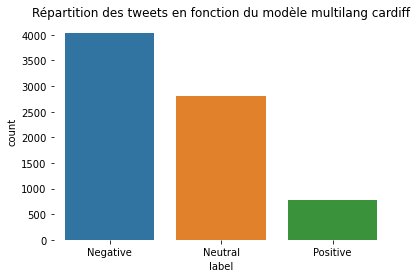

In [24]:
sns.countplot(x= sent_cardiff["label"])
plt.title("Répartition des tweets en fonction du modèle multilang cardiff")
plt.box(False)
plt.xlabel('label');

In [25]:
#importation du modele nlptown
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
model = BertForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model = model, tokenizer = tokenizer)

In [37]:
sent_nlptown = (
    train
    .assign(sentiment = lambda x: x['text'].apply(lambda s: classifier(s)))
    .assign(
         label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
         score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))
    )
)

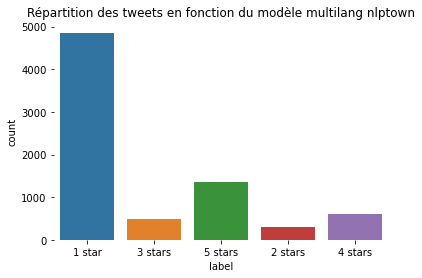

In [27]:
sns.countplot(x= sent_nlptown["label"])
plt.title("Répartition des tweets en fonction du modèle multilang nlptown")
plt.xlabel('tweet rating')
plt.box(False)
plt.xlabel('label');

### transformation des données issues du modèle nlptown

In [57]:
sent_nlptown['labels'] = sent_nlptown['label'].apply(lambda x:re.sub(r'star|stars', '', x))
sent_nlptown['labels'] = sent_nlptown['labels'].apply(lambda x:re.sub(r's', '', x))
def number_to_sentiment(rating):
    rating = int(rating)
    if rating <= 2:
        return 0
    elif rating == 3:
        return 1
    else:
        return 2
    
sent_nlptown.sentiment = sent_nlptown.labels.apply(number_to_sentiment)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


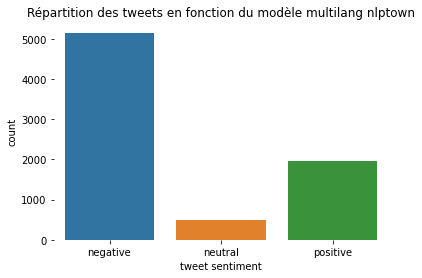

In [58]:
class_names = ['negative', 'neutral', 'positive']
ax = sns.countplot(sent_nlptown.sentiment)
plt.title("Répartition des tweets en fonction du modèle multilang nlptown")
plt.box(False)
plt.xlabel('tweet sentiment')
ax.set_xticklabels(class_names);

### installation modèle spacy => tokenizer dans scikit-learn

In [21]:
#!python -m spacy download en_core_web_lg 

In [33]:
import spacy
nlp = spacy.load('en_core_web_lg')

#importaton du tokenizer spacy
def spacy_tokenizer(doc):
    return [x.orth_ for x in nlp(doc)]

### Fonctions polarité et diversité 

In [ ]:
# fonctions utilisant librairie textblob
from textblob import TextBlob

def get_polarity(text):
    try:
        textblob = TextBlob(unicode(text, 'utf-8'))
        pol = textblob.sentiment.polarity
    except:
        pol = 0.0
    return pol

def get_subjectivity(text):
    try:
        textblob = TextBlob(unicode(text, 'utf-8'))
        subj = textblob.sentiment.subjectivity
    except:
        subj = 0.0
    return subj

In [ ]:
train['polarity'] = train['text'].apply(get_polarity)
train['subjectivity'] = train['text'].apply(get_subjectivity)

## Pré-processing du texte

In [145]:
from textblob import TextBlob
train['content_clean'] = train['text'].astype('string')
train['content_clean'] =  train['content_clean'].str.lower()

# application de règles ==> suppression de phases de nettoyage ok pour sentiment analysis mais qui détruissent de l'information por classification 
train['content_clean'] = train['content_clean'].apply(lambda x: re.sub(r'([a-z])\1{2,}', r'\1',x)) #normalization double lettre
train['content_clean'] = train['content_clean'].apply(lambda x: re.sub('http\S+\s*', '', x)) #supprime les urls http
train['content_clean'] = train['content_clean'].apply(lambda x: re.sub('@(\w+)| http\S+\s*',' ', x)) #supprime les urls https + mentions
train['content_clean'] = train['content_clean'].apply(lambda x:re.sub('([#])|([^a-zA-Z])',' ', x)) #supprimme juste le caractère # maiss garde le keyword
train['content_clean'] = train['content_clean'].apply(lambda x: re.sub('pic.twitter.com\S+\s*','',  x))
train['content_clean'] = train['content_clean'].apply(lambda x: corr(x)) # ajoute un espace après un point ou une virgule (correction erreur de frappe)
train['content_clean'] = train['content_clean'].apply(lambda x: re.sub('\S*@\S*\s?','',  x)) # supprimme les adresses mails.
train['content_clean'] = train['content_clean'].apply(lambda x:re.sub(r'\d+', '', x)) # supprimme chiffres
train['content_clean'] = train['content_clean'].apply(lambda x:re.sub('\w*\d\w*', '', x)) # supprimme mot mix lettres/chiffres
train['content_clean'] = train['content_clean'].apply(lambda x:re.sub(r'^\s+|\s+?$', '', x))
train['content_clean'] = train['content_clean'].apply(lambda x: clean_text_contractions(x))
#train['content_clean'] = train['content_clean'].apply(lambda x: str(TextBlob(x).correct())) # accroit fortement temps de traitement
#train['content_clean'] = train['content_clean'].apply(lambda x: normalize(x)) # accroit fortement temps de traitement
#train['content_clean'] = train['content_clean'].apply(lambda x: text_std(x)) # correction des contractions des auxiliaires 
train['content_clean'] = train['content_clean'].apply(lambda x: clean_text_contractions(x))
train['content_clean'] = train['content_clean'].apply(lambda x:re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿЀ-ӿ/]+', ' ', x)) # supprime tous les caractères spéciaux tous sauf accent
train['content_clean'] = train['content_clean'].apply(lambda x: ' '.join([item for item in x.split() if item not in STOP_WORDS])) # suppression des stopwords
train['content_clean'] = train['content_clean'].apply(lambda x:re.sub(r'\b\w{1,2}\b', ' ', x)) # supprime element inf à 3 caractères
train['content_clean'] = train['content_clean'].apply(lambda x: re.sub(r"^\s+", "", x)) #supprimme espacce devant le texte
train['content_clean'] = train['content_clean'].apply(lambda x:re.sub(r'\s+', ' ', x)) # supprimme extra spaces
train['content_clean'] = train['content_clean'].apply(lambda x: remove_emoji(x))
train = train.loc[train['content_clean'].str.split().str.len().gt(2)]  


#stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
train['stem_content_clean'] = train['content_clean'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#lemmatization
from textblob import Word
train['lem_content_clean'] = train['content_clean'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

#### RQ
 - Suppression de certaines regex/application de fonction dans la phase de nettoyage car concurrent à détruire de l'information por classification (conclusion différente pour une tâche de sentiment analysis ==>besoin de normalisation est à rechercher)

In [146]:
train.head(10)

,id,keyword,location,text,target,content_clean,stem_content_clean,lem_content_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake allah forgive,deed reason earthquak allah forgiv,deed reason earthquake allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near ronge sask canada,forest fire near rong sask canada,forest fire near ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...,resid ask shelter place notifi offic evacu she...,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...,peopl receiv wildfir evacu order california,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,sent photo ruby alaska smoke wildfires pours s...,sent photo rubi alaska smoke wildfir pour school,sent photo ruby alaska smoke wildfire pours sc...
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy closed directi...,rockyfir updat california hwi close direct lak...,rockyfire update california hwy closed directi...
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,flood disaster heavy rain causes flash floodin...,flood disast heavi rain caus flash flood stree...,flood disaster heavy rain cause flash flooding...
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,hill fire woods,hill fire wood,hill fire wood
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,emergency evacuation happening building street,emerg evacu happen build street,emergency evacuation happening building street
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,afraid tornado coming area,afraid tornado come area,afraid tornado coming area


In [ ]:
writer = pd.ExcelWriter('train_kaggle.xlsx', engine='xlsxwriter')
train.to_excel(writer, sheet_name='Sheet1')
writer.save()

## Premiers tests modélisation

### Baseline et tests des modèles

In [147]:
from sklearn.model_selection import train_test_split
seed = 42
X = train.content_clean
y = train.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,stratify=train[['target']], random_state=seed)

In [148]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [154]:
# adapté d'un notebook kaggle
def acc_summary(pipeline, X_train, y_train, X_test, y_test):
    class_fit = pipeline.fit(X_train, y_train)
    y_pred = class_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
   
    print("-"*30)
    
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    
    print("-"*30)
    
    return accuracy

In [155]:
# liste des modèles à tester
# adapté d'un notebook kaggle
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression",
         "Multinomial","Bernouli", "PassiveAggressiveClassifier","SVC", 'LinearSVC', "SGDClassifier"]

# appel des modèles+features modèles
classifiers = [
    KNeighborsClassifier(n_neighbors=4),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(class_weight='balanced'), #réflexion sur l'utilisation unbalanced
    MultinomialNB(),
    BernoulliNB(),
    PassiveAggressiveClassifier(max_iter=50),
    SVC(kernel="linear",class_weight='balanced'),
    LinearSVC(class_weight='balanced',loss='hinge'),
    SGDClassifier(loss='hinge', penalty='l2', early_stopping=True,
                             class_weight='balanced'),
]


In [156]:
# adapté d'un notebook kaggle
from sklearn.feature_extraction.text import TfidfTransformer
zipped_clf = zip(names, classifiers)
tvec = TfidfVectorizer()  
def compare_clf(classifier=zipped_clf, vectorizer=tvec, n_features=10000, ngram_range=(1,2)):
    result = []
    vectorizer.set_params(stop_words=STOP_WORDS, max_features=n_features,
                          ngram_range=ngram_range)
    for n, c in classifier:
        checker_pipeline = Pipeline([
            ('vect', CountVectorizer(max_df=1.0,min_df=1,lowercase=False,encoding='utf-8',
                                              tokenizer=spacy_tokenizer,analyzer='word')),
            ('tfidf', TfidfTransformer()),
            ("classifier", c)])
        clf_acc = acc_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        print("Model result for {}".format(n))
        print(c)
        result.append((n, clf_acc))
    return result

In [157]:
compare_result = compare_clf()

------------------------------
accuracy score: 75.85%
------------------------------
Model result for K Nearest Neighbors
KNeighborsClassifier(n_neighbors=4)
------------------------------
accuracy score: 73.33%
------------------------------
Model result for Decision Tree
DecisionTreeClassifier()
------------------------------
accuracy score: 78.09%
------------------------------
Model result for Random Forest
RandomForestClassifier()
------------------------------
accuracy score: 79.91%
------------------------------
Model result for Logistic Regression
LogisticRegression(class_weight='balanced')
------------------------------
accuracy score: 79.49%
------------------------------
Model result for Multinomial
MultinomialNB()
------------------------------
accuracy score: 79.86%
------------------------------
Model result for Bernouli
BernoulliNB()
------------------------------
accuracy score: 76.60%
------------------------------
Model result for PassiveAggressiveClassifier
PassiveAg

### Optimisation avec SGDC

In [158]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from time import time

SEED = 42
X = train.content_clean #sans stemming ==>forte diminution performance après le passage au stemming
y = train.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, stratify=train[['target']],
                                                    random_state=SEED)

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(tol=1e-3, loss='hinge',
                          learning_rate = 'optimal')),
])

parameters = {
    'vect__max_df': (0.25, 0.5, 0.75, 1.0),
     'vect__max_features': (None, 50, 100, 500),
    'vect__ngram_range': ((1, 1), (1, 2), (1, 3)),  # unigrams u ngrams
     'tfidf__use_idf': (True, False), # avec ss tfidf
     'tfidf__norm': ('l1', 'l2'),#
    'clf__max_iter': (40),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'), # stratégie de pénalisation
     'clf__max_iter': (10, 50, 80), #nb interations
}

if __name__ == "__main__":
 
    grid_search = GridSearchCV(pipeline, parameters, cv=10,
                               n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(X_train, y_train)
   
    print("done in %0.3fs" % (time() - t0))

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

optimised_grid_search = grid_search.best_estimator_

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__max_iter': (10, 50, 80),
 'clf__penalty': ('l2', 'elasticnet'),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.25, 0.5, 0.75, 1.0),
 'vect__max_features': (None, 50, 100, 500),
 'vect__ngram_range': ((1, 1), (1, 2), (1, 3))}
Fitting 10 folds for each of 2304 candidates, totalling 23040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 11218 tasks      

done in 705.151s
Best score: 0.791
Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 10
	clf__penalty: 'l2'
	tfidf__norm: 'l1'
	tfidf__use_idf: True
	vect__max_df: 1.0
	vect__max_features: None
	vect__ngram_range: (1, 3)


C:\Users\ADSL\Anaconda43\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [114]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

score = optimised_grid_search.score(X_test, y_test)
print("Accuracy:", score)

y_pred=cross_val_predict(optimised_grid_search, X_test, y_test)

confusion_matrix(y_test, y_pred)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))
print("Test F-score:{:.2f} ".format(100 * metrics.f1_score(y_test, y_pred)))

print(metrics.classification_report(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

Accuracy: 0.7944055944055944


C:\Users\ADSL\Anaconda43\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Precision: 69.68%
Recall: 77.73%
Test F-score:73.49 
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1184
           1       0.70      0.78      0.73       961

    accuracy                           0.75      2145
   macro avg       0.75      0.75      0.75      2145
weighted avg       0.75      0.75      0.75      2145



array([[859, 325],
       [214, 747]], dtype=int64)

### Commentaires sur résultats 
-Mur des 80 % d'accuracy
- réflexion sur le pré-traitement (lemmatisation en plus du stemming)
- mobilisation de modèles de deep learning évolués (résultats proches de ceux obtenus ici avec seulement un modèle de base de deep learning)

## Bac à sable

### Top mots sans normalisation 
- To do faceting sur la base du classification 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
train_ = train.loc[train['target'] == 1]
train['content_clean'] = train['text'].astype('string')
train['content_clean'] =  train['content_clean'].str.lower()

#suppression des éléments entre crochets, parenthèses, urls, mentions, chiffres et hastags
train['content_clean'] =  train['content_clean'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
train['content_clean'] =  train['content_clean'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])
train['content_clean'] =  train['content_clean'].apply(lambda x:re.sub(r'\b\w{1,2}\b', '', x)) 
train['content_clean'] = train['content_clean'].str.replace('\/', ' ')
train['content_clean'] = train['content_clean'].apply(lambda x: strip_all_entities(x)) 
train['content_clean'] = train['content_clean'].apply(lambda x:re.sub(r'\d+', '', x))
train['content_clean'] = train['content_clean'].apply(lambda x:re.sub(r'\s+', ' ', x))
train['content_clean'] = train['content_clean'].apply(lambda x:re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿЀ-ӿ/]+', ' ', x))

#tokenization
train['unigrams'] = train['content_clean'].apply(prepare, pipeline=pipeline)

tableau_token = train.explode('unigrams')
tableau_token = tableau_token [["unigrams"]]
volume = tableau_token ['unigrams'].value_counts()
volume = pd.DataFrame(data = volume)
volume['words'] = volume.index
volume.columns = ['volume','word'] 
volume = volume[['volume', 'word']]
volume['word'] =  volume ['word'].astype('string')

#filtrage sur les 50 ièmes valeur en volume
N=30
df = volume.sort_values(by = "volume", ascending = False).head(N)
#df = df.iloc[1: , :] # filtrage na values

source = df

bars = alt.Chart(source).mark_bar(color = '#335DFF', size=10).encode(
   alt.X('volume:Q'),
   alt.Y('word', sort=alt.EncodingSortField(field="comptes", op="count",
                                            order='ascending'))
).properties(height=500, width=600, 
             title = "TOP 30 des mots les plus présents après filtrage des mots communs")
bars

alt.Chart(...)

In [96]:
train['content_clean'] = train['text'].str.lower() 
train['hash'] = train['content_clean'].astype('string').str.findall(r'(?<![#\w])#(\w{1,250})').apply(','.join)

detail =  train['hash'].value_counts()
volume = pd.DataFrame(data=detail)
volume.reset_index(inplace=True)
volume = volume.rename(columns = {'index':'hashtag', "hash": "volume"})

volume["unigrams"] = volume["hashtag"].apply(nltk.word_tokenize)
tableau_hash = volume.explode('unigrams')
tableau_hash = tableau_hash.drop(['hashtag'], axis = 1)

df = tableau_hash.groupby(['unigrams'])['volume'].sum().reset_index()

N = 30
df = df.sort_values(by = "volume",ascending = False).head(N)
df = df.iloc[1: , :]

source = df

bars = alt.Chart(source).mark_bar(color = '#335DFF', size = 8).encode(
   alt.X('volume:Q'),
   alt.Y('unigrams', sort = alt.EncodingSortField(field = "comptes", 
                                                  op = "count", 
                                                  order = 'ascending')))
(bars).properties(height = 400, width = 600,
                  title = "TOP 30 des # les plus présents au sein de l'ensemble des tweets")

alt.Chart(...)

In [97]:
train['mentions'] = train['text'].astype('string').str.findall(r'(?<![@\w])@(\w{1,250})').apply(','.join)

detail =  train['mentions'].value_counts()
volume = pd.DataFrame(data=detail)
volume.reset_index(inplace=True)
volume = volume.rename(columns = {'index':'mention', 
                                  "mentions": "volume"})

volume["unigrams"] = volume["mention"].apply(nltk.word_tokenize)
tableau_hash = volume.explode('unigrams')
tableau_hash = tableau_hash.drop(['mention'], axis = 1)

df = tableau_hash.groupby(['unigrams'])['volume'].sum().reset_index()

N = 50
df = df.sort_values(by = "volume",ascending = False).head(N)
df = df.iloc[1: , :]

source = df

bars = alt.Chart(source).mark_bar(color = '#335DFF', size = 8).encode(
   alt.X('volume:Q'),
   alt.Y('unigrams', sort = alt.EncodingSortField(field = "comptes", 
                                                  op = "count", 
                                                  order = 'ascending')))
(bars).properties(height = 500, width = 600,
                  title = "TOP 30 des mentions les plus présentes au sein de l'ensemble des tweets")

alt.Chart(...)

In [98]:
train_1 = train.loc[train['target'] == 1]
train_1 ['content_clean'] = train_1 ['text'].astype('string')
train_1 ['content_clean'] =  train_1 ['content_clean'].str.lower()

#suppression des éléments entre crochets, parenthèses, urls, mentions, chiffres et hastags
train_1 ['content_clean'] =  train_1 ['content_clean'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
train_1 ['content_clean'] =  train_1 ['content_clean'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])
train_1 ['content_clean'] =  train_1 ['content_clean'].apply(lambda x:re.sub(r'\b\w{1,2}\b', '', x)) 
train_1 ['content_clean'] = train_1 ['content_clean'].str.replace('\/', ' ')
train_1 ['content_clean'] = train_1 ['content_clean'].apply(lambda x: strip_all_entities(x)) 
train_1 ['content_clean'] = train_1 ['content_clean'].apply(lambda x:re.sub(r'\d+', '', x))
train_1 ['content_clean'] = train_1 ['content_clean'].apply(lambda x:re.sub(r'\s+', ' ', x))
train_1 ['content_clean'] = train_1 ['content_clean'].apply(lambda x:re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿЀ-ӿ/]+', ' ', x))

#tokenization
train_1 ['unigrams'] = train_1 ['content_clean'].apply(prepare, pipeline=pipeline)

#transformation des données
tableau_token = train_1.explode('unigrams')
tableau_token = tableau_token [["unigrams"]]
volume = tableau_token ['unigrams'].value_counts()
volume = pd.DataFrame(data = volume)
volume['words'] = volume.index
volume.columns = ['volume','word'] 
volume = volume[['volume', 'word']]
volume['word'] =  volume ['word'].astype('string')

#filtrage sur les 50 ièmes valeur en volume
N=30
df = volume.sort_values(by = "volume", ascending = False).head(N)
#df = df.iloc[1: , :] # filtrage na values

source = df

bars = alt.Chart(source).mark_bar(color = ' #16a726', size=10).encode(
   alt.X('volume:Q'),
   alt.Y('word', sort=alt.EncodingSortField(field="comptes", op="count",
                                            order='ascending'))
).properties(height=500, width=600, 
             title = "TOP 30 des mots les plus présents sur les tweets cible 1 après filtrage des mots communs")
bars

alt.Chart(...)

In [99]:
train_1['mentions'] = train_1['text'].astype('string').str.findall(r'(?<![@\w])@(\w{1,250})').apply(','.join)

detail =  train_1['mentions'].value_counts()
volume = pd.DataFrame(data=detail)
volume.reset_index(inplace=True)
volume = volume.rename(columns = {'index':'mention', 
                                  "mentions": "volume"})

volume["unigrams"] = volume["mention"].apply(nltk.word_tokenize)
tableau_hash = volume.explode('unigrams')
tableau_hash = tableau_hash.drop(['mention'], axis = 1)

df = tableau_hash.groupby(['unigrams'])['volume'].sum().reset_index()

N = 50
df = df.sort_values(by = "volume",ascending = False).head(N)
df = df.iloc[1: , :]

source = df

bars = alt.Chart(source).mark_bar(color = '#16a726', size = 8).encode(
   alt.X('volume:Q'),
   alt.Y('unigrams', sort = alt.EncodingSortField(field = "comptes", 
                                                  op = "count", 
                                                  order = 'ascending')))
(bars).properties(height = 500, width = 600,
                  title = "TOP 30 des mentions les plus présentes au sein de l'ensemble des tweets")

alt.Chart(...)

In [100]:
train_0 = train.loc[train['target'] == 0]
train_0  ['content_clean'] = train_0 ['text'].astype('string')
train_0  ['content_clean'] =  train_0 ['content_clean'].str.lower()

#suppression des éléments entre crochets, parenthèses, urls, mentions, chiffres et hastags
train_0['content_clean'] =  train_0['content_clean'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
train_0['content_clean'] =  train_0['content_clean'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])
train_0['content_clean'] =  train_0['content_clean'].apply(lambda x:re.sub(r'\b\w{1,2}\b', '', x)) 
train_0['content_clean'] = train_0['content_clean'].str.replace('\/', ' ')
train_0['content_clean'] = train_0['content_clean'].apply(lambda x: strip_all_entities(x)) 
train_0['content_clean'] = train_0['content_clean'].apply(lambda x:re.sub(r'\d+', '', x))
train_0['content_clean'] = train_0['content_clean'].apply(lambda x:re.sub(r'\s+', ' ', x))
train_0['content_clean'] = train_0['content_clean'].apply(lambda x:re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿЀ-ӿ/]+', ' ', x))

#tokenization
train_0['unigrams'] = train_0['content_clean'].apply(prepare, pipeline=pipeline)

#transformation des données
tableau_token = train_0.explode('unigrams')
tableau_token = tableau_token [["unigrams"]]
volume = tableau_token ['unigrams'].value_counts()
volume = pd.DataFrame(data = volume)
volume['words'] = volume.index
volume.columns = ['volume','word'] 
volume = volume[['volume', 'word']]
volume['word'] =  volume ['word'].astype('string')

#filtrage sur les 50 ièmes valeur en volume
N=30
df = volume.sort_values(by = "volume", ascending = False).head(N)
#df = df.iloc[1: , :] # filtrage na values

source = df

bars = alt.Chart(source).mark_bar(color = '#0f0e0e', size=10).encode(
   alt.X('volume:Q'),
   alt.Y('word', sort=alt.EncodingSortField(field="comptes", op="count",
                                            order='ascending'))
).properties(height=500, width=600, 
             title = "TOP 30 des mots les plus présents sur les tweets cible 0 après filtrage des mots communs")
bars

alt.Chart(...)

In [ ]:
# test Gradient Boosting ==> à optimiser? to do comprendre hyper-paramètres du modèle

In [307]:
from sklearn.metrics import classification_report

seed = 42
X = train.content_clean
y = train.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=seed)

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('gbc', GradientBoostingClassifier(learning_rate=0.1,                                            
                                            n_estimators=2000,
                                            max_depth=9,
                                            min_samples_split=6,
                                            min_samples_leaf=2,
                                            max_features=8,
                                            subsample=0.9))
])
# fit du modle
pipeline.fit(X_train, y_train)

# prediction avec paramètres du modèle
y_pred = pipeline.predict(X_test)

# évaluation qualité du modèle
accuracy = metrics.accuracy_score(y_pred, y_test)
print("Test accuracy: ", accuracy)
print(classification_report(y_test, y_pred))   
print(metrics.classification_report(y_test, y_pred, target_names=["0", "1"]))
print("Test F-score: ", metrics.f1_score(y_test, y_pred))

Test accuracy:  0.7730426164519326
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1093
           1       0.78      0.70      0.74       925

    accuracy                           0.77      2018
   macro avg       0.77      0.77      0.77      2018
weighted avg       0.77      0.77      0.77      2018

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1093
           1       0.78      0.70      0.74       925

    accuracy                           0.77      2018
   macro avg       0.77      0.77      0.77      2018
weighted avg       0.77      0.77      0.77      2018

Test F-score:  0.7379862700228833
